# **Naive Bayes Classifier**

In this kernel, I tried to implement **Naive Bayes Classification** algorithm with Python and Scikit-Learn to predict whether a person makes over 50K a year or not.

# **Introduction to Naive Bayes algorithm**

# **Types of Naive Bayes algorithm**

# **Gaussian Naïve Bayes:**

* Assumes continuous features follow a Gaussian distribution.
* Best for datasets with continuous features (e.g., word frequencies) that are
normally distributed.
* Commonly used in text classification tasks.

# **Multinomial Naïve Bayes:**

* Assumes features follow a multinomial distribution, typically used for discrete features representing counts or frequencies.
* Well-suited for text classification tasks where features represent the frequency of words or other discrete tokens in documents.
* Commonly used in document classification, sentiment analysis, and spam filtering.

# **Bernoulli Naïve Bayes:**

* Assumes features are binary (presence/absence), where each feature represents the presence or absence of a particular attribute.
* Particularly useful for binary features or data naturally represented as binary.
* Commonly used in text classification tasks, especially for considering the presence of specific keywords in documents.

# **Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install category_encoders
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

# **Import dataset**

In [ ]:
df = pd.read_csv('adult.csv')

# **Exploratory Data Analysis**

In [ ]:
# view dimensions of the dataset

df.shape

(32560, 15)

In [ ]:
# preview the dataset

df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


**Renaming columns**

The dataset columns are does not convey proper meanings, so giving them suitbale names

In [ ]:
# column names to be assigned
col_names = ['age', 'workclass', 'final_weight', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

# assigning names
df.columns = col_names

df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


**Now, the columns have meaningful names.**

**Structure of Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   final_weight    32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Statistical Summary**

In [ ]:
df.describe()

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Seperating into Numerical and Categorical Features**

In [ ]:
def separate_features(df):
    categorical_features = df.select_dtypes(include=['object']).columns.tolist()
    numerical_features = df.select_dtypes(include=['int', 'float']).columns.tolist()
    return categorical_features, numerical_features

categorical, numerical = separate_features(df)

print("Categorical features:", categorical)
print("Numerical features:", numerical)

Categorical features: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
Numerical features: ['age', 'final_weight', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


**Displaying Numerical Features**

In [ ]:
df[numerical].head()

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


**Check Missing Values in Numerical Features**

In [ ]:
df[numerical].isnull().sum()

age               0
final_weight      0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

**Further Checking for Missing Values**

In [ ]:
for var in numerical:

    print(df[var].value_counts())

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: final_weight, Length: 21647, dtype: int64
9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital_gain, Length: 119, dtype: int64
0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital_loss, Length: 92, dtype: int64
40    15216
50     2819
45 

**Visualizing Missing Values**

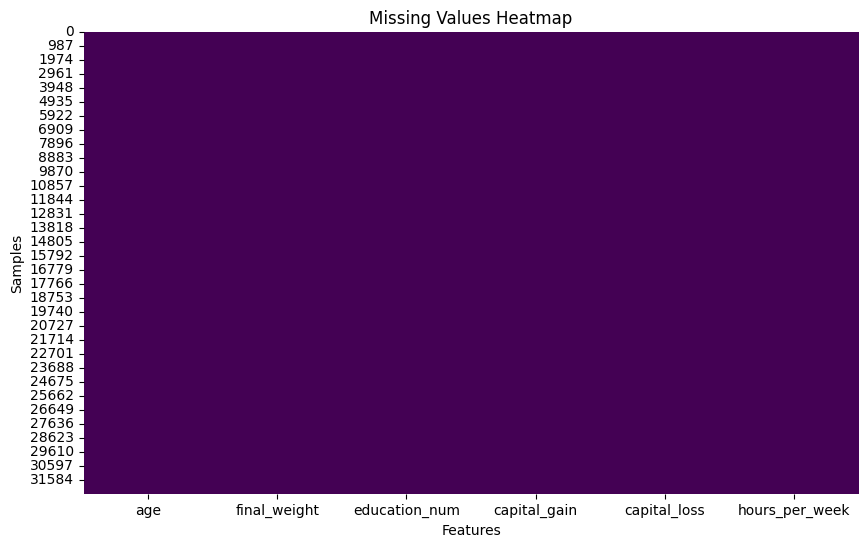

In [ ]:
def missing_num_values(df):
    missing_values = df[numerical].isnull()

    # Create a heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(missing_values, cmap='viridis', cbar=False)
    plt.title('Missing Values Heatmap')
    plt.xlabel('Features')
    plt.ylabel('Samples')
    plt.show()


missing_num_values(df)

**Not a single Missing Values in Numerical Features**

**Plotting Histograms To See the Distribution**

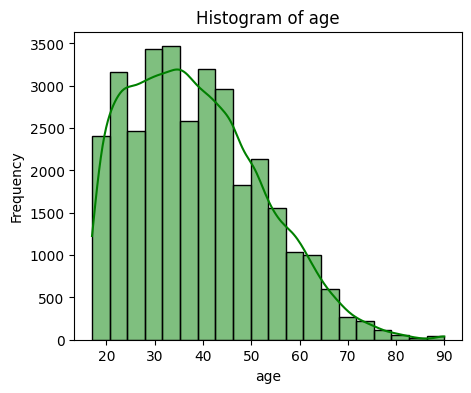

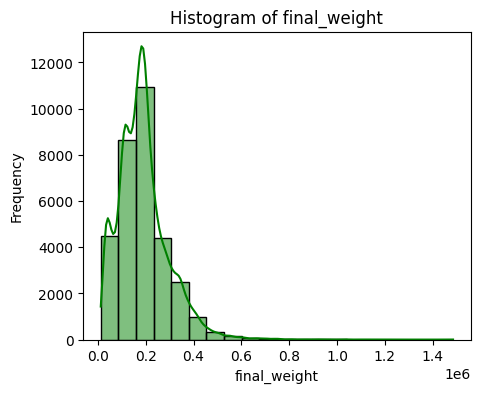

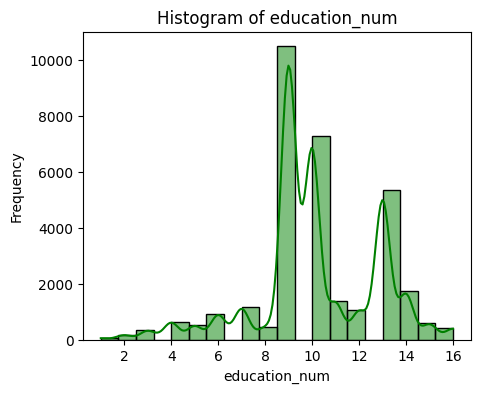

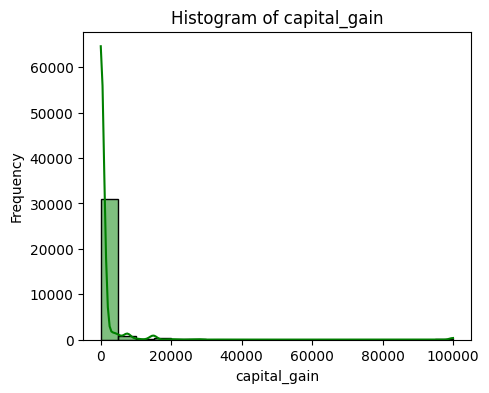

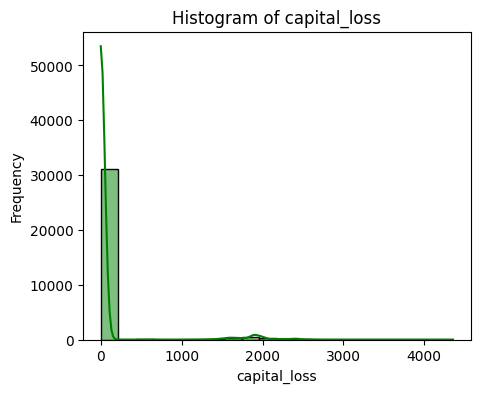

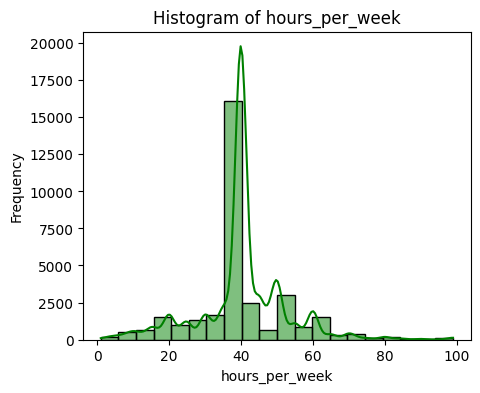

In [ ]:
def visualize_numerical_features(df):
    for num_feat in numerical:
        plt.figure(figsize=(5, 4))
        sns.histplot(data=df, x=num_feat, kde=True, bins=20, color='green')
        plt.title(f'Histogram of {num_feat}')
        plt.xlabel(num_feat)
        plt.ylabel('Frequency')
        plt.show()

visualize_numerical_features(df)

**Displaying Categorical Features**


In [ ]:
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


**Check Missing Values in Categorical Features**

In [ ]:
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

**Further Checking for Missing Values**

In [ ]:
for var in categorical:
  print(df[var].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

Now we can see that, **workclass, occupation and native_country** contains missing values. The previous method failed to detect them because .isnull() considers NaN as a missing values, but in our case the missing values are coded as, '?'. So we need to replace the '?' with NaN and later with suitable values

**Replacing '?' With Nan**

In [ ]:
col = ['workclass', 'occupation', 'native_country']

for c in col:
  df[c].replace(' ?', np.NaN, inplace=True)

In [ ]:
col = ['workclass', 'occupation', 'native_country']

for c in col:
  print(df[c].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64
 United-States                 29169
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England    

Now all the '?' values are replaced with NaN

**Checking the Missing Values**

In [ ]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

Now we can see there are missing values in workclass, occupation and native_country, which we have to fill with suitable values!

**Imputing Missing Values With Mode**

In [ ]:
# Columns Having NaN
nan_col = ['workclass', 'occupation', 'native_country']

# Imputing missing values with mode
for col in nan_col:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

# Verifying
for col in nan_col:
    print(f'Missing Values in {col} : ', df[col].isnull().sum())



Missing Values in workclass :  0
Missing Values in occupation :  0
Missing Values in native_country :  0


**Visualizing Missing Values**

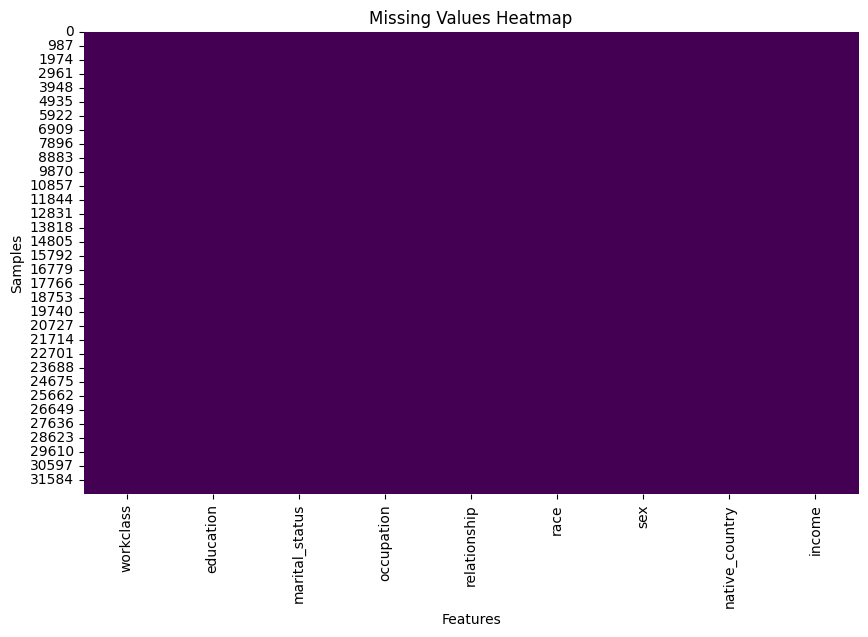

In [ ]:
def missing_cat_values(df):
    missing_val = df[categorical].isnull()

    # Create a heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(missing_val, cmap='viridis', cbar=False)
    plt.title('Missing Values Heatmap')
    plt.xlabel('Features')
    plt.ylabel('Samples')
    plt.show()


missing_cat_values(df)

Now all the missing values have imputed with mode successfully!

**Declaring Feature Vector and A Target Variable**

In [ ]:
X = df.drop(['income'], axis=1)
y = df['income']

In [ ]:
df.select_dtypes('object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


**Splitting the Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

**Encoding Categorical Features**

In [ ]:
# Applying One-Hot Encoding
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

**Encoding Dependent Feature**

In [ ]:
# Convert categories in y_train
y_train_bin = y_train.map({' <=50K': 0, ' >50K': 1})

# Convert categories in y_test
y_test_bin = y_test.map({' <=50K': 0, ' >50K': 1})


**Feature Scaling**

In [ ]:
# Applying Robust Scaler
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Model Creation**

In [ ]:
# Applying Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# fitting the model
gnb.fit(X_train, y_train)

**Making Predictions and Evaluating The Model**

In [ ]:
# Evaluations on Test Set
y_pred = gnb.predict(X_test)
print('Model\'s Testing Accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# Evaluations on Train Set
y_pred_on_train = gnb.predict(X_train)
print('Model\'s Training Accuracy: {0:0.4f}'. format(accuracy_score(y_train, y_pred_on_train)))

Model's Testing Accuracy: 0.7977
Model's Training Accuracy: 0.7945


**Comparing The Model With Null Accuracy**

In [ ]:
y_test.value_counts()

 <=50K    7456
 >50K     2312
Name: income, dtype: int64

In [ ]:
null_accuracy = ( 7456 / (7456+2312) )
print('Null accuracy score is: {0:0.4f}'. format(null_accuracy))

Null accuracy score is: 0.7633


**By comparing the Null Accuracy with the model's Testing and Training Accuracy, we can say that the model has learned something new from the data!**


**Plotting A Confusion Matrix**

<Axes: >

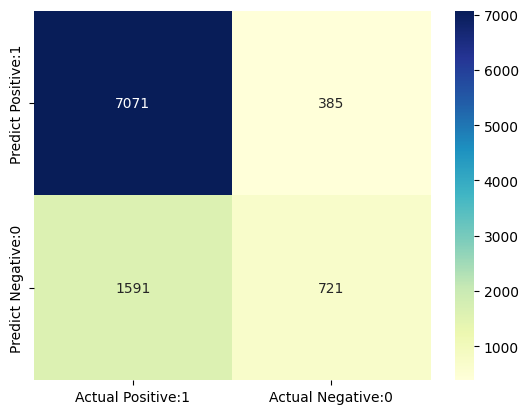

In [ ]:
con_matrix = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=con_matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                                            index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

The confusion matrix shows 7071 + 721 = 7792 correct predictions and 1591 + 385 = 1976 incorrect predictions.

True Positives (Actual Positive:1 and Predict Positive:1) -> **7071**

True Negatives (Actual Negative:0 and Predict Negative:0) -> **721**

False Positives (Actual Negative:0 but Predict Positive:1) -> **385 (Type I error)**

False Negatives (Actual Positive:1 but Predict Negative:0) - > **1591 (Type II error)**

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88      7456
        >50K       0.65      0.31      0.42      2312

    accuracy                           0.80      9768
   macro avg       0.73      0.63      0.65      9768
weighted avg       0.78      0.80      0.77      9768



**Right now there is a classification threshold level of 0.5. Now we will try to find the optimal threshold level!**

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB

# Initialize cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

optimal_thresholds = []
for train_index, val_index in skf.split(X_train_scaled, y_train_bin):
    # Split data into training and validation folds
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train_bin.iloc[train_index], y_train_bin.iloc[val_index]

    # Train the model on the training fold
    gnb.fit(X_train_fold, y_train_fold)

    # Predict probabilities on the validation fold
    y_val_prob = gnb.predict_proba(X_val_fold)[:, 1]

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_val_fold, y_val_prob)

    # Find the optimal threshold (You can adjust this part based on your criteria)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]

    # Append the optimal threshold of this fold
    optimal_thresholds.append(optimal_threshold)


# Retrain the model on the entire scaled training set
gnb.fit(X_train_scaled, y_train_bin)

# Predict probabilities on the scaled test set
y_test_prob = gnb.predict_proba(X_test_scaled)[:, 1]

for th in optimal_thresholds:
    # Apply the final optimal threshold to make final predictions
    y_test_pred = (y_test_prob >= th).astype(int)

    # Evaluate the model
    from sklearn.metrics import classification_report, confusion_matrix
    print(f"Classification Report for threshold {th} is:\n", classification_report(y_test_bin, y_test_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test_bin, y_test_pred))


Classification Report for threshold 0.26667915995788183 is:
               precision    recall  f1-score   support

           0       0.94      0.76      0.84      7456
           1       0.52      0.85      0.64      2312

    accuracy                           0.78      9768
   macro avg       0.73      0.80      0.74      9768
weighted avg       0.84      0.78      0.79      9768

Confusion Matrix:
 [[5654 1802]
 [ 358 1954]]
Classification Report for threshold 0.5753355638447764 is:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86      7456
           1       0.55      0.80      0.65      2312

    accuracy                           0.80      9768
   macro avg       0.74      0.80      0.76      9768
weighted avg       0.84      0.80      0.81      9768

Confusion Matrix:
 [[5957 1499]
 [ 459 1853]]
Classification Report for threshold 0.3295542337778242 is:
               precision    recall  f1-score   support

           0      

**Below is the threshold's list**

In [ ]:
optimal_thresholds

[0.26667915995788183,
 0.5753355638447764,
 0.3295542337778242,
 0.11990177554367626,
 0.1662563773174953]

**From the above classification reports, we can see that the Threshold give gave the most accurate results is 0.5753355638447764. Thus we can now use this!**